# Credit Card Default Data

### Description:
The dataset contains information on default payments, demographics, credit data, history of payment, and bill statements of credit card clients in India from October 2018 to March 2019.

### Usage
Default

### Format
A data frame with 10000 observations on the following 25 variables

***ID***: ID of each client

***LIMIT_BAL***: Amount of given credit in INR (includes individual and family/supplementary credit

***FICO***: Bureau Scor/Credit Score (Ranges from 300 to 900)

***EDUCATION***: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

***MARRIAGE***: Marital status (1=married, 2=single, 3=others)

***AGE***: Age in years

***SEX***: Male/Female

***PAY_1***: Repayment status in March, 2019 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

***PAY_2***: Repayment status in February, 2019 (scale same as above)

***PAY_3***: Repayment status in January, 2019 (scale same as above)

***BILL_AMT4***: Amount of bill statement in December, 2018 (INR)

***BILL_AMT5***: Amount of bill statement in November, 2018 (INR)

***BILL_AMT6***: Amount of bill statement in October, 2018 (INR)

***PAY_AMT4***: Amount of previous payment in December, 2018 (INR)

***PAY_AMT5***: Amount of previous payment in November, 2018 (INR)

***PAY_AMT6***: Amount of previous payment in October, 2018 (INR)

***default***: Default payment in next month (1=yes, 0=no)



#### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [4]:
Default = pd.read_csv('CreditCardDefault.csv')

#Glimpse of Data
Default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay%1,Pay%2,Pay%3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### Fixing messy column names (containing % sign) for ease of use

In [5]:
Default.columns = Default.columns.str.replace('%', '_')

#### Checking top 5 rows again

In [6]:
Default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [7]:
print('The number of rows (observations) is',Default.shape[0],'\n''The number of columns (variables) is',Default.shape[1])

The number of rows (observations) is 4246 
The number of columns (variables) is 17


#### Data types of all variables

In [8]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   int64  
 3   EDUCATION  4246 non-null   int64  
 4   MARRIAGE   4246 non-null   int64  
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay_1      4246 non-null   float64
 13  Pay_2      4246 non-null   float64
 14  Pay_3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(9), object(1)
memory usage: 564.0+ KB


In [9]:
Default.duplicated().sum()

0

In [10]:
Default.drop('ID', axis = 1, inplace = True)

#### Converting data type of Gender, Education & Marriage to Object as they are character variables

In [11]:
Default["SEX"] = Default["SEX"].astype('object')
Default["EDUCATION"] = Default["EDUCATION"].astype('object')
Default["MARRIAGE"] = Default["MARRIAGE"].astype('object')

#### Rechecking Data types of all variables

In [12]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  4246 non-null   float64
 1   SEX        4246 non-null   object 
 2   EDUCATION  4246 non-null   object 
 3   MARRIAGE   4246 non-null   object 
 4   AGE        4246 non-null   int64  
 5   BILL_AMT4  4246 non-null   float64
 6   BILL_AMT5  4246 non-null   int64  
 7   BILL_AMT6  4246 non-null   int64  
 8   PAY_AMT4   4246 non-null   float64
 9   PAY_AMT5   4246 non-null   float64
 10  PAY_AMT6   4246 non-null   int64  
 11  Pay_1      4246 non-null   float64
 12  Pay_2      4246 non-null   float64
 13  Pay_3      4246 non-null   float64
 14  default    4246 non-null   int64  
 15  FICO       4246 non-null   object 
dtypes: float64(7), int64(5), object(4)
memory usage: 530.9+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables.

In [13]:
Default.describe()

,LIMIT_BAL,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default
count,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,157117.286858,35.047574,57061.098917,53771.845973,51647.689590,5616.298398,5193.867640,5717.024494,0.566373,0.549659,0.681941,0.227037
std,130528.792785,9.110943,68727.390542,64368.227196,62985.909815,14647.382789,14114.021638,16549.440680,3.454705,3.953106,4.462142,0.418966
min,10000.000000,21.000000,511.000000,511.000000,511.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,13726.500000,12985.000000,11514.750000,1111.000000,1111.000000,911.000000,0.030000,0.040000,0.030000,0.000000
50%,120000.000000,33.000000,31130.500000,28922.500000,28138.000000,2136.000000,2111.000000,2111.000000,0.040000,0.050000,0.040000,0.000000
75%,230000.000000,41.000000,74406.750000,71826.500000,68806.500000,5111.000000,5111.000000,5111.000000,0.120000,0.140000,0.140000,0.000000
max,1000000.000000,73.000000,891586.000000,927171.000000,961664.000000,321118.000000,417991.000000,261111.000000,106.560000,129.650000,153.330000,1.000000


In [59]:
Default["default"].value_counts()

0    3282
1     964
Name: default, dtype: int64

#### Now, let us check the basic measures of descriptive statistics for the categorical variables

In [14]:
Default["SEX"].value_counts()

2    2530
1    1716
Name: SEX, dtype: int64

In [15]:
Default["EDUCATION"].value_counts()

2    2109
1    1416
3     721
Name: EDUCATION, dtype: int64

In [16]:
Default["MARRIAGE"].value_counts()

2    2324
1    1861
3      58
0       3
Name: MARRIAGE, dtype: int64

In [17]:
#Clubbing the levels of Marital Status into Married vs. Single
Default["MARRIAGE"] = np.where(Default["MARRIAGE"] == 1, 1, 0)

In [18]:
Default["MARRIAGE"].value_counts()

0    2385
1    1861
Name: MARRIAGE, dtype: int64

#### Checking proportion of default

In [20]:
Default.default.sum() / len(Default.default)

0.22703721149317005

#### Check for missing values

In [21]:
Default.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Pay_1        0
Pay_2        0
Pay_3        0
default      0
FICO         0
dtype: int64

There are no missing values in the dataset.

#### Getting Top 5 rows

In [22]:
Default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_1,Pay_2,Pay_3,default,FICO
0,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


#### Eliminating redundant variables

In [23]:
#Since we already have Payment to Bill ratio variables, we can eliminate the Payment and Bill Amounts
Default = Default.drop(['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)

In [24]:
Default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,FICO
0,50000.0,2,2,1,37,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,0,29,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,0,24,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,0,39,0.10,0.08,36.27,0,MT700


#### Creating dummy variables

In [25]:
default_dummy = pd.get_dummies(Default,drop_first=True)
default_dummy.head()

,LIMIT_BAL,MARRIAGE,AGE,Pay_1,Pay_2,Pay_3,default,SEX_2,EDUCATION_2,EDUCATION_3,FICO_MT700
0,50000.0,1,37,0.04,0.04,0.04,0,1,1,0,1
1,250000.0,0,29,0.05,0.05,0.06,0,0,0,0,1
2,20000.0,0,24,0.00,0.09,0.00,1,0,0,0,0
3,320000.0,1,49,0.30,33.40,0.26,0,0,0,0,1
4,130000.0,0,39,0.10,0.08,36.27,0,1,0,1,1


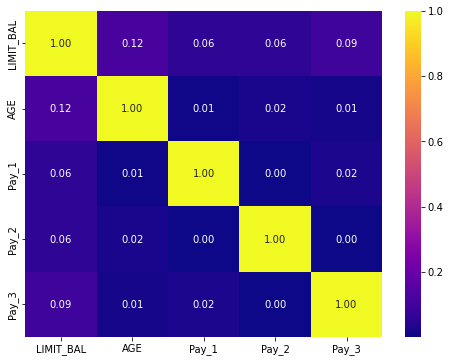

In [26]:
plt.subplots(figsize = (8,6))
sns.heatmap(default_dummy[['LIMIT_BAL', 'AGE', 'Pay_1','Pay_2', 'Pay_3']] .corr(), annot = True, cmap = 'plasma', fmt = '.2f');

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

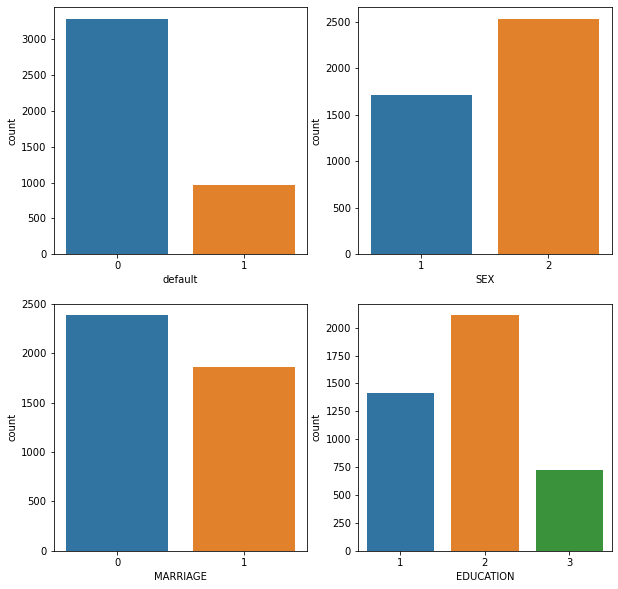

In [72]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
sns.countplot(Default['default'])

plt.subplot(2,2,2)
sns.countplot(Default['SEX'])

plt.subplot(2,2,3)
sns.countplot(Default['MARRIAGE'])

plt.subplot(2,2,4)
sns.countplot(Default['EDUCATION'])


<AxesSubplot:xlabel='AGE', ylabel='Density'>

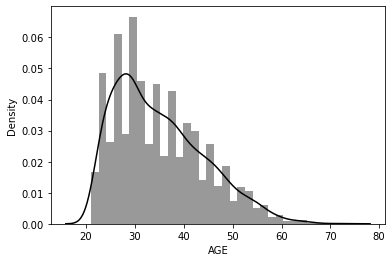

In [75]:
sns.distplot(Default['AGE'], color = 'black')

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

#### Now, Importing statsmodels modules

In [27]:
import statsmodels.formula.api as SM

#### Creating train & test datasets

In [28]:
X = default_dummy.drop(['default'], axis=1)
y = default_dummy['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142,stratify=default_dummy['default'])

#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

#### Creating logistic regression equation & storing it in f_1

Lets check signifiance of variable 'Score' in a logistic regression model

#### Descriptive statistics of Target variable

In [29]:
Default_train["default"].value_counts()

0    2625
1     771
Name: default, dtype: int64

#### Checking if dataset is balanced

In [30]:
Default_train.default.sum() / len(Default_train.default)

0.22703180212014135

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [56]:
# Create random forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=142)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       657
           1       0.96      0.91      0.94       193

    accuracy                           0.97       850
   macro avg       0.97      0.95      0.96       850
weighted avg       0.97      0.97      0.97       850



In [57]:
importances = rf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print("{}: {}".format(feature, importance))

LIMIT_BAL: 0.05145174428289184
MARRIAGE: 0.007461624717066781
AGE: 0.042061289555414
Pay_1: 0.04295776135117427
Pay_2: 0.10285766914440303
Pay_3: 0.03984686766827063
SEX_2: 0.008045078295256223
EDUCATION_2: 0.006642494769057726
EDUCATION_3: 0.005026162757456202
FICO_MT700: 0.6936493074590092


## Feature Selection

The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

For example, when faced with two models with the same or nearly the same score, but with the latter model using more variables, your immediate instinct should be to choose the one with fewer variables. That model is simpler to train, simpler to understand, easier to run, and less time consuming. 

Lets start with feature selection methods & validate them back using manual feature selection using backward elimination approach:

# Lets try & test features manually using backward elimination approach:

## Model 1

#### Logistic regression on 'default_smote' dataset

In [31]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_1 + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156125
         Iterations 10


#### Checking the coefficients

In [32]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3385
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7085
Time:                        15:17:27   Log-Likelihood:                -530.20
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2665      0.355      3.572      0.000       0.572       1.961
LIMIT_BAL   -1.801e-06   7.13e-07     -2.526      0.012    -3.2e-06   -4.03e-07
AGE             0.0039      0.009      0.411      0.681      -0.015       0.022
Pay_1           0.0009      0.020      0.045      0.964      -0.038       0.039
Pay_2           0.0380      0.017      2.254      0.024       0.005       0.071
Pay_3          -0.0743      0.025     -2.964      0.003      -0.123      -0.025
SEX_2          -0.2775      0.160     -1.736      0.083      -0.591       0.036
EDUCATION_2     0.2892      0.184      1.571      0.116      -0.072       0.650
EDUCATION_3     0.1400      0.245      0.571      0.568      -0.341       0.621
MARRIAGE        0.2802      0.180      1.557      0.120      -0.073       0.633
FICO_MT700     -7.7487      0.529    -14.641      0.000      -8.786      -6.711
===============================================================================
"""

Variable Pay_1 has the highest p-value and is insignificant, therefore, we need to eliminate it.

## Model 2

In [33]:
model_2 = SM.logit(formula = 'default ~ LIMIT_BAL + AGE + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156125
         Iterations 10


In [34]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3386
Method:                           MLE   Df Model:                            9
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7085
Time:                        15:17:27   Log-Likelihood:                -530.20
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2669      0.354      3.575      0.000       0.572       1.962
LIMIT_BAL   -1.799e-06   7.12e-07     -2.527      0.011   -3.19e-06   -4.04e-07
AGE             0.0038      0.009      0.410      0.682      -0.015       0.022
Pay_2           0.0380      0.017      2.253      0.024       0.005       0.071
Pay_3          -0.0743      0.025     -2.964      0.003      -0.123      -0.025
SEX_2          -0.2771      0.160     -1.736      0.083      -0.590       0.036
EDUCATION_2     0.2886      0.184      1.572      0.116      -0.071       0.649
EDUCATION_3     0.1394      0.245      0.569      0.569      -0.341       0.619
MARRIAGE        0.2806      0.180      1.560      0.119      -0.072       0.633
FICO_MT700     -7.7487      0.529    -14.641      0.000      -8.786      -6.711
===============================================================================
"""

Now, AGE has the highest p-value and is insignificant, therefore, we need to eliminate it.

In [35]:
model_3 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + EDUCATION_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156150
         Iterations 10


In [36]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3387
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7085
Time:                        15:17:27   Log-Likelihood:                -530.29
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3842      0.210      6.587      0.000       0.972       1.796
LIMIT_BAL   -1.753e-06   7.02e-07     -2.495      0.013   -3.13e-06   -3.76e-07
Pay_2           0.0384      0.017      2.281      0.023       0.005       0.071
Pay_3          -0.0744      0.025     -2.972      0.003      -0.123      -0.025
SEX_2          -0.2833      0.159     -1.783      0.075      -0.595       0.028
EDUCATION_2     0.2849      0.183      1.554      0.120      -0.074       0.644
EDUCATION_3     0.1537      0.242      0.634      0.526      -0.322       0.629
MARRIAGE        0.3124      0.162      1.924      0.054      -0.006       0.631
FICO_MT700     -7.7484      0.529    -14.636      0.000      -8.786      -6.711
===============================================================================
"""

Eliminating Education_3

In [37]:
model_4 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + EDUCATION_2 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156210
         Iterations 10


In [38]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7084
Time:                        15:17:27   Log-Likelihood:                -530.49
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4486      0.185      7.835      0.000       1.086       1.811
LIMIT_BAL   -1.871e-06   6.76e-07     -2.767      0.006    -3.2e-06   -5.46e-07
Pay_2           0.0383      0.017      2.264      0.024       0.005       0.071
Pay_3          -0.0744      0.025     -2.967      0.003      -0.124      -0.025
SEX_2          -0.2835      0.159     -1.785      0.074      -0.595       0.028
EDUCATION_2     0.2244      0.157      1.426      0.154      -0.084       0.533
MARRIAGE        0.3343      0.159      2.107      0.035       0.023       0.645
FICO_MT700     -7.7439      0.529    -14.636      0.000      -8.781      -6.707
===============================================================================
"""

Eliminating Education_2

In [39]:
model_5 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + SEX_2 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156509
         Iterations 10


In [40]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3389
Method:                           MLE   Df Model:                            6
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7078
Time:                        15:17:27   Log-Likelihood:                -531.50
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5765      0.163      9.672      0.000       1.257       1.896
LIMIT_BAL  -2.033e-06   6.66e-07     -3.051      0.002   -3.34e-06   -7.27e-07
Pay_2          0.0388      0.017      2.277      0.023       0.005       0.072
Pay_3         -0.0727      0.025     -2.923      0.003      -0.121      -0.024
SEX_2         -0.2801      0.159     -1.765      0.077      -0.591       0.031
MARRIAGE       0.3478      0.158      2.198      0.028       0.038       0.658
FICO_MT700    -7.7406      0.529    -14.637      0.000      -8.777      -6.704
==============================================================================
"""

Eliminating Gender varaible

In [41]:
model_6 = SM.logit(formula = 'default ~ LIMIT_BAL + Pay_2 + Pay_3 + MARRIAGE + FICO_MT700', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.156973
         Iterations 10


In [42]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3390
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.7070
Time:                        15:17:27   Log-Likelihood:                -533.08
converged:                       True   LL-Null:                       -1819.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4068      0.129     10.939      0.000       1.155       1.659
LIMIT_BAL  -2.017e-06   6.64e-07     -3.038      0.002   -3.32e-06   -7.15e-07
Pay_2          0.0378      0.017      2.228      0.026       0.005       0.071
Pay_3         -0.0731      0.025     -2.938      0.003      -0.122      -0.024
MARRIAGE       0.3546      0.158      2.243      0.025       0.045       0.664
FICO_MT700    -7.7367      0.529    -14.628      0.000      -8.773      -6.700
==============================================================================
"""

Now all the variables are significant, therefore, we don't need to eliminate any variable.

## Prediction on the Data

Now, let us see the predicted probability values.

In [43]:
y_prob_pred_train = model_6.predict(Default_train)
y_prob_pred_train

275     0.002151
294     0.787433
1226    0.001330
1656    0.002289
1051    0.737637
          ...   
2579    0.792891
459     0.002216
1001    0.002070
3240    0.723205
850     0.768926
Length: 3396, dtype: float64

Let us now see the predicted classes

In [44]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

# Model Evaluation on the Training Data

Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

In [45]:
from sklearn import metrics

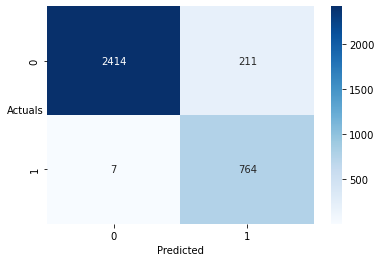

In [46]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [47]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.997     0.920     0.957      2625
           1      0.784     0.991     0.875       771

    accuracy                          0.936      3396
   macro avg      0.890     0.955     0.916      3396
weighted avg      0.949     0.936     0.938      3396



Overall 94% of correct predictions to total predictions were made by the model

99% of those defaulted were correctly identified as defaulters by the model

#### Now, let us see the predicted probability values on test dataset

In [48]:
y_prob_pred_test = model_6.predict(Default_test)
y_prob_pred_test

381     0.002443
9       0.787098
3819    0.826387
661     0.001166
1205    0.001511
          ...   
3543    0.727354
3980    0.001542
1782    0.002155
2042    0.784404
3597    0.001029
Length: 850, dtype: float64

Let us now see the predicted classes

In [49]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

# Model Evaluation on the Test Data

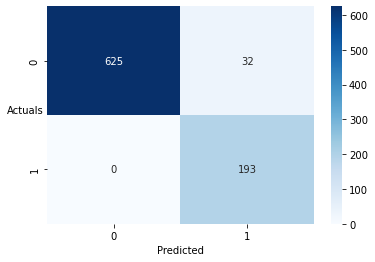

In [50]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [51]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.951     0.975       657
           1      0.858     1.000     0.923       193

    accuracy                          0.962       850
   macro avg      0.929     0.976     0.949       850
weighted avg      0.968     0.962     0.963       850



Overall 96% of correct predictions to total predictions were made by the model

100% of those defaulted were correctly identified as defaulters by the model

## <font color = 'red'> <center >END </center> </font>